In [36]:
import pandas as pd 

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.10.29/data_sum.xlsx")

data

,FORCE_C(Left),X COORDINATE_C(Left),Y COORDINATE_C(Left),FSR DATA_C(Left),FORCE_B(Right),FSR DATA_B(Right)
0,1.245014,1.529382,-0.886157,1.361804,2.277552,1.757358
1,1.274000,1.749337,-1.368345,1.264316,2.319914,1.524890
2,1.389941,1.748738,-1.086286,1.166829,2.447001,1.524890
3,1.254676,1.777098,-1.389048,0.874366,2.531726,1.292421
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
608,2.037281,0.870283,0.317515,1.069341,1.472665,-0.334861
609,1.969648,0.872209,0.349021,1.166829,0.413604,-0.102392
610,1.998633,1.085799,0.020937,1.069341,1.345578,0.362545
611,1.902016,0.930805,0.082657,0.776878,1.049041,1.059952


FORCE_C(Left)


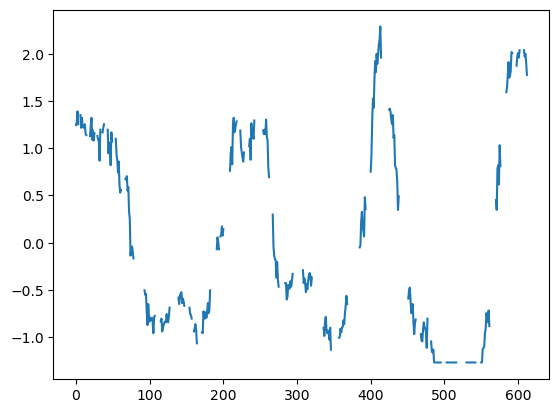

X COORDINATE_C(Left)


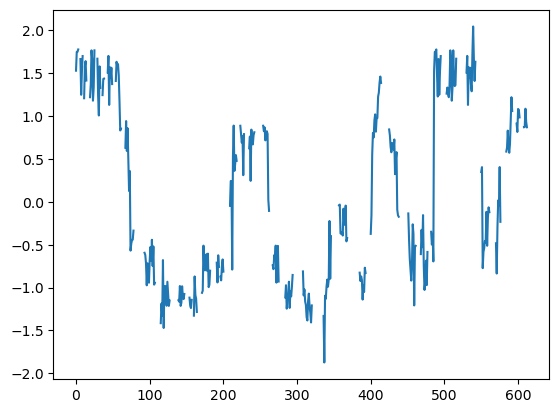

Y COORDINATE_C(Left)


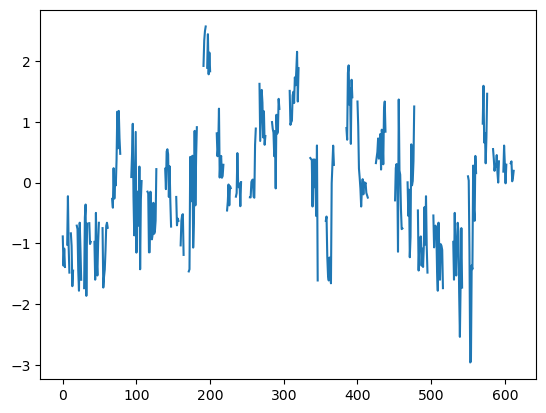

FSR DATA_C(Left)


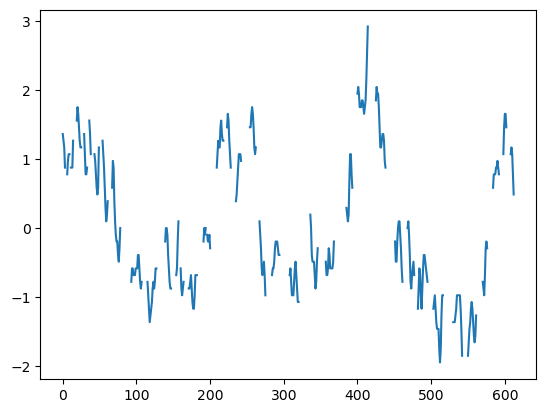

FORCE_B(Right)


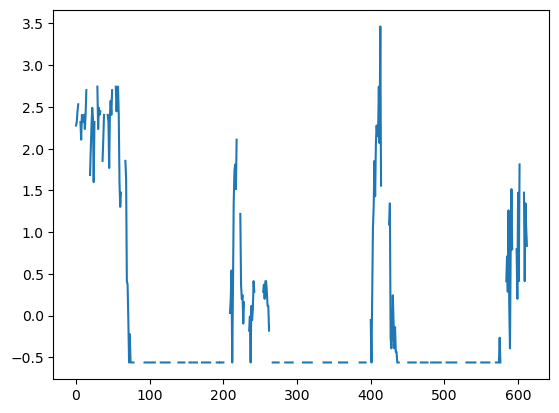

FSR DATA_B(Right)


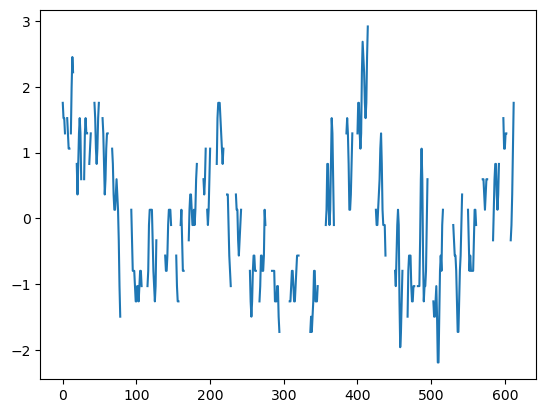

In [37]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()

In [38]:
data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.10.29/squart.xlsx")

R2=data2.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
R_scaled=scaler.fit_transform(R2)

R3=pd.DataFrame(data=R_scaled)

R_new=R3.set_axis(["FORCE_B(Right)","FSR DATA_B(Right)"],axis="columns")

R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left)','FSR DATA_C(Left)']]

<Axes: >

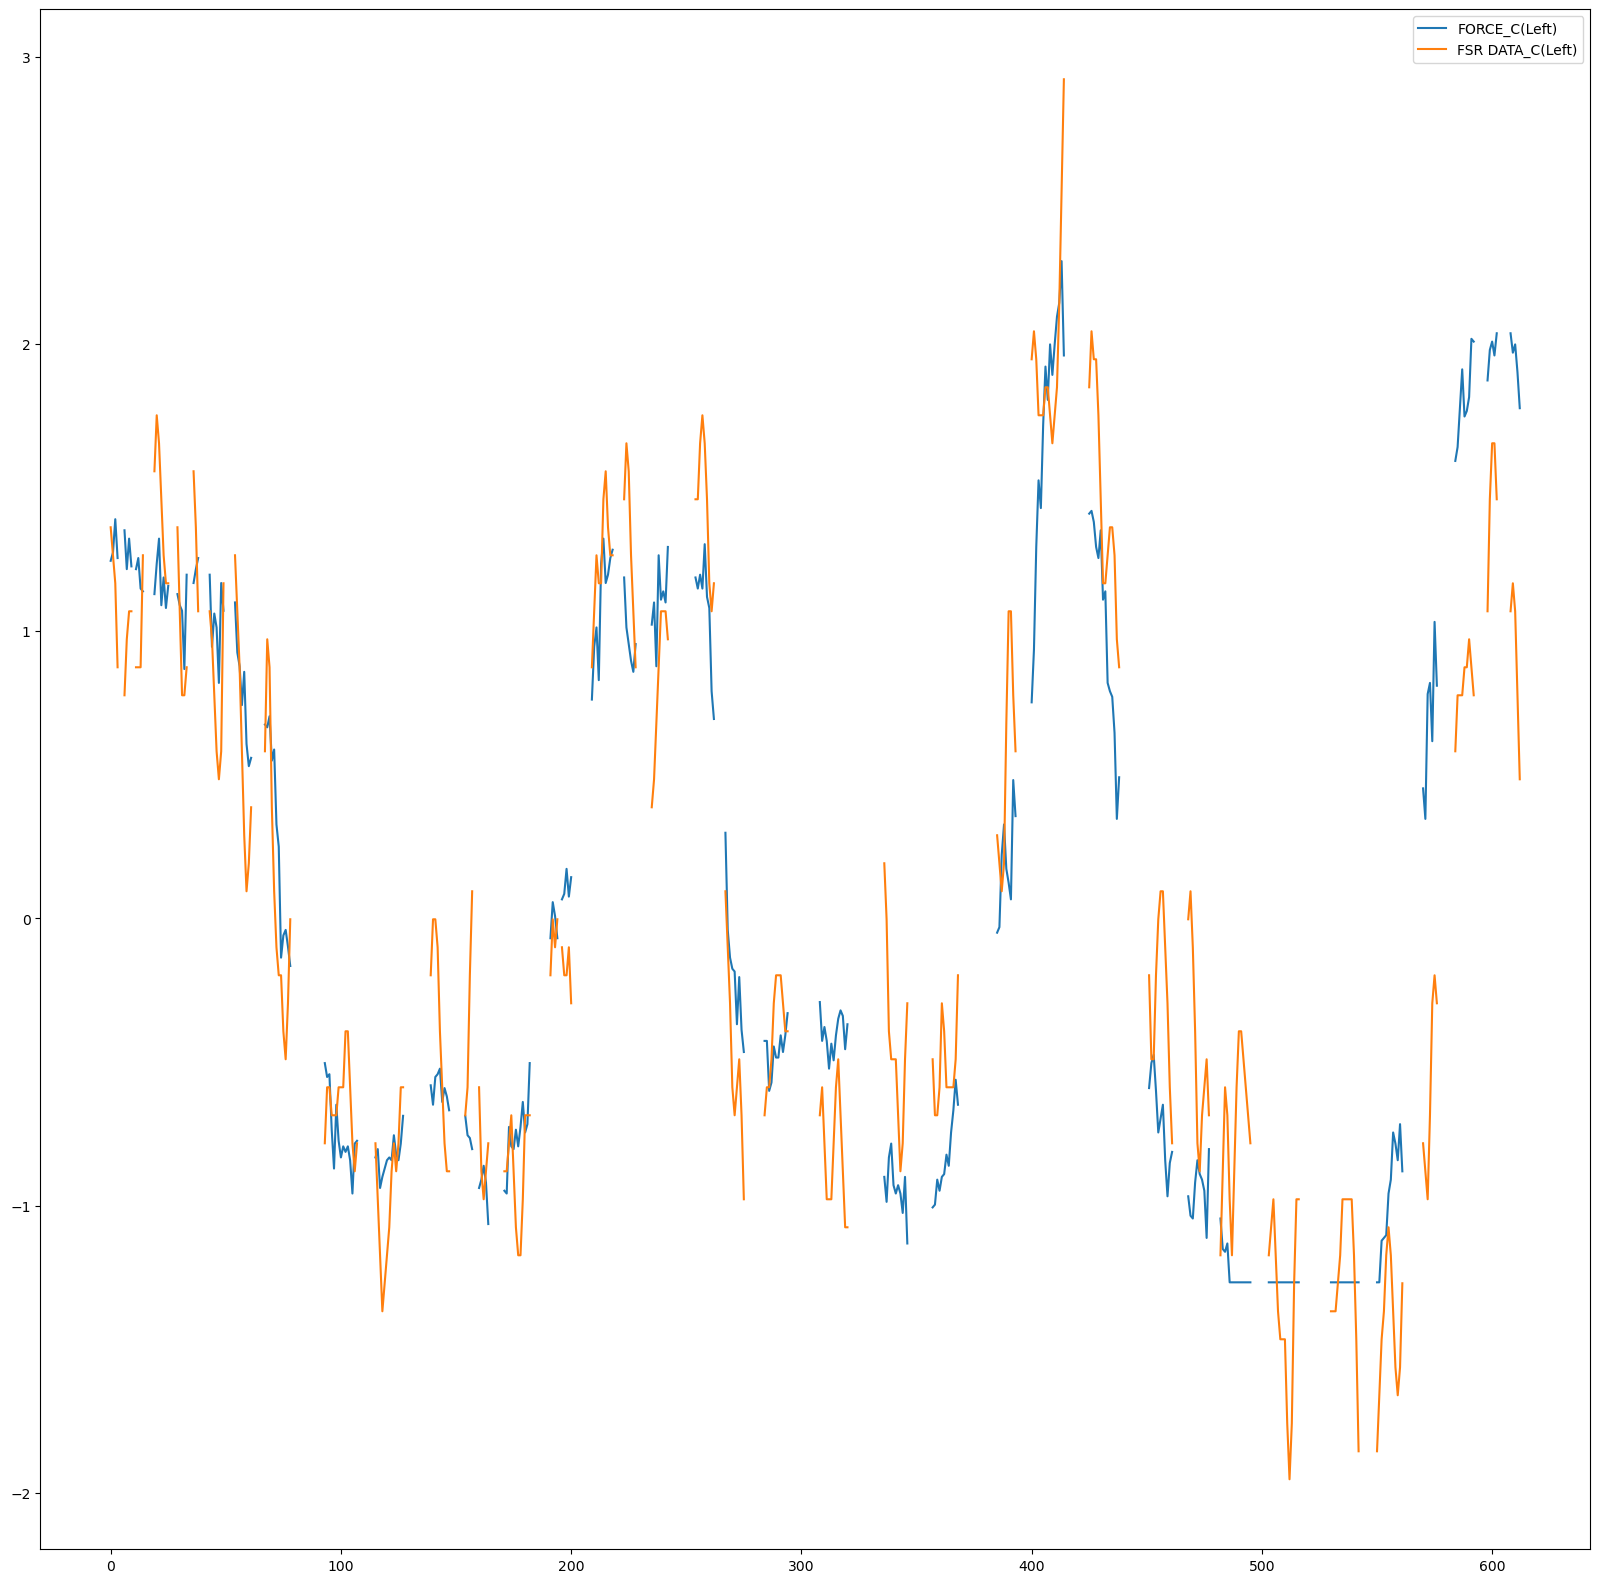

In [39]:
L.plot(figsize=(20,20))

<Axes: >

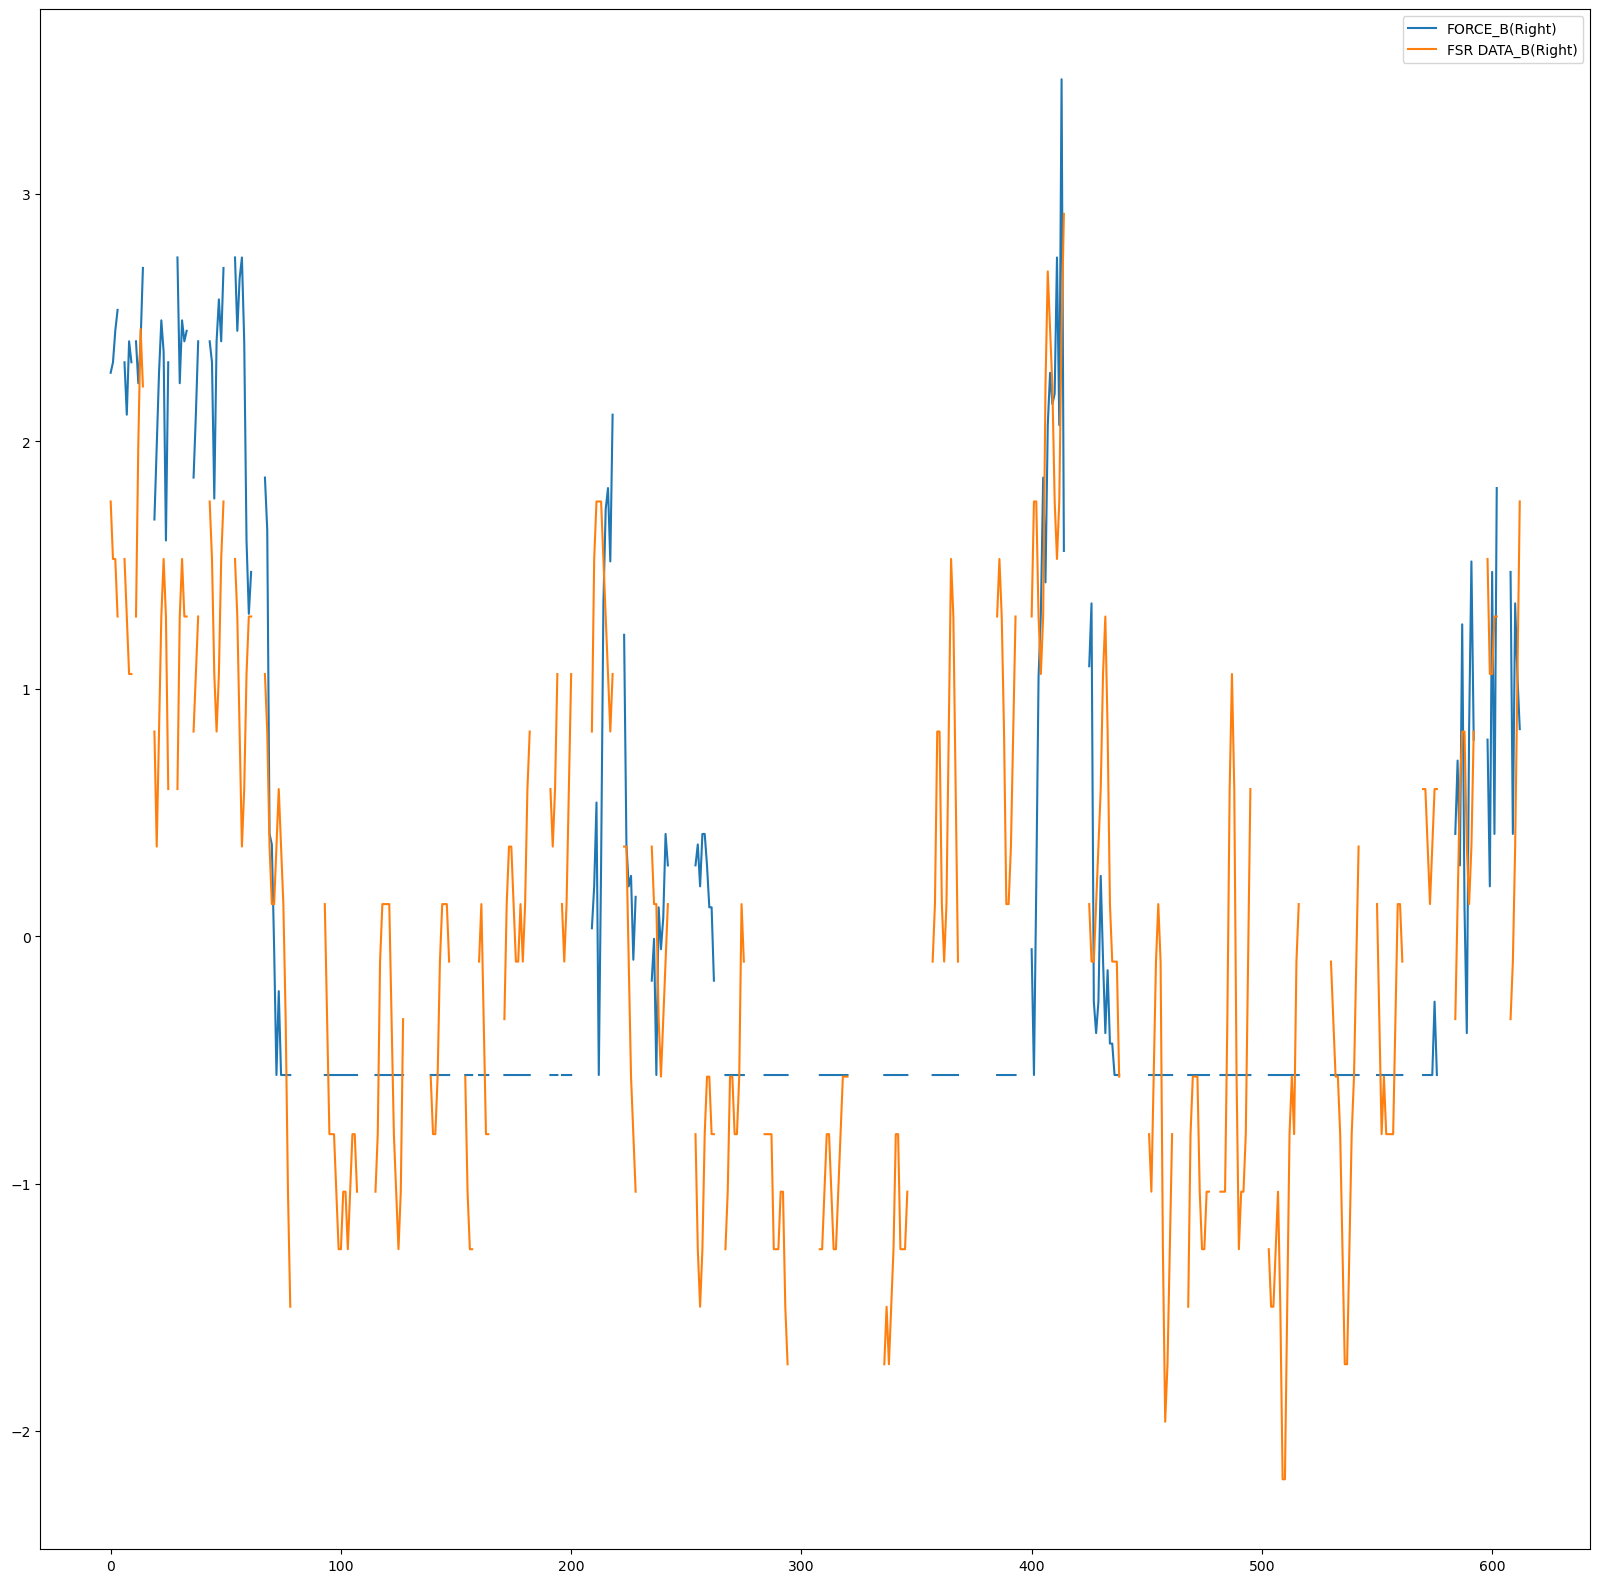

In [40]:
R.plot(figsize=(20,20))

In [41]:
import numpy as np

index=R.index

loss_index_R_FORECE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]
loss_index_R_FSR_B=np.array(R.index).reshape(-1,1)[R.iloc[:,1].isna()]

normal_index_R_FORECE_B=np.setdiff1d(index,loss_index_R_FORECE_B)
normal_index_R_FSR_B=np.setdiff1d(index,loss_index_R_FSR_B)

index=L.index

loss_index_L_FORECE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORECE_C=np.setdiff1d(index,loss_index_L_FORECE_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

x_train_R_FORECE_B=normal_index_R_FORECE_B.reshape(-1,1)
y_train_L_FORECE_C=L.iloc[normal_index_L_FORECE_C,0]
x_test_L_FORECE_C=loss_index_L_FORECE_C

x_train_R_FSR_B=normal_index_R_FSR_B.reshape(-1,1)
y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_FORCE_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [44]:
print(x_train_R_FORECE_B[0].dtype)
print(x_train_R_FSR_B[0].dtype)

int64
int64


In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu')))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')





In [50]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(348, 1)
(348,)


In [58]:
x_train_R_FORECE_B=x_train_R_FORECE_B.reshape(-1,1,1)
x_train_R_FSR_B=x_train_R_FSR_B.reshape(-1,1,1)

In [59]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(348, 1, 1)
(348,)


In [60]:
print(x_train_R_FORECE_B.dtype)
print(x_train_R_FSR_B.dtype)

int64
int64


In [61]:
model_cnn_lstm.fit(x_train_R_FORECE_B,y_train_L_FORECE_C)
pred=model_cnn_lstm.predict(x_test_L_FORECE_C)
pred=pred.reshape(-1,1)

ValueError: in user code:

    File "/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/keras/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'time_distributed_25' (type TimeDistributed).
    
    Input 0 of layer "conv1d_12" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 1)
    
    Call arguments received by layer 'time_distributed_25' (type TimeDistributed):
      • inputs=tf.Tensor(shape=(None, 1, 1), dtype=int64)
      • training=True
      • mask=None
